In [ ]:
pip install requests

In [ ]:
response = requests.get(url, params=params)
print(response.json())  # Print the full API response

{'copyright': 'Copyright 2025 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt', 'stats': [{'type': {'displayName': 'gameLog'}, 'group': {'displayName': 'hitting'}, 'exemptions': [], 'splits': [{'season': '2022', 'stat': {'summary': '2-5 | 2B, K, R', 'gamesPlayed': 1, 'flyOuts': 0, 'groundOuts': 2, 'airOuts': 0, 'runs': 1, 'doubles': 1, 'triples': 0, 'homeRuns': 0, 'strikeOuts': 1, 'baseOnBalls': 0, 'intentionalWalks': 0, 'hits': 2, 'hitByPitch': 0, 'avg': '.400', 'atBats': 5, 'obp': '.400', 'slg': '.600', 'ops': '1.000', 'caughtStealing': 0, 'stolenBases': 0, 'stolenBasePercentage': '.---', 'groundIntoDoublePlay': 0, 'groundIntoTriplePlay': 0, 'numberOfPitches': 14, 'plateAppearances': 5, 'totalBases': 3, 'rbi': 0, 'leftOnBase': 1, 'sacBunts': 0, 'sacFlies': 0, 'babip': '.500', 'groundOutsToAirouts': '2.00', 'catchersInterference': 0, 'atBatsPerHomeRun': '-.--'}, 'team': {'id': 147, 'n

In [ ]:
import requests
import json

# Example: Fetch season stats for Giancarlo Stanton (2022)
player_id = 516770  # Giancarlo Stanton's MLBAM ID
season = "2022"
url = f"https://statsapi.mlb.com/api/v1/people/{player_id}/stats"
params = {
    "stats": "season",  # Fetch cumulative season stats
    "season": season
}

# Make the API request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Format and print the JSON response in a readable way
    formatted_response = json.dumps(response.json(), indent=4)
    print(formatted_response)
else:
    print(f"Error: {response.status_code} - {response.reason}")


{
    "copyright": "Copyright 2025 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt",
    "stats": []
}


In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Adjust pandas display settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

# Baseball Reference game log URL for 2024 season
url = "https://www.baseball-reference.com/players/gl.fcgi?id=judgeaa01&t=b&year=2024#all_batting_gamelogs"

# Fetch the page content
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # Locate the table by ID
    table = soup.find("table", {"id": "batting_gamelogs"})

    # Debug: Print raw HTML for the table
    print("Raw Table HTML:")
    print(str(table)[:1000])  # Print the first 1000 characters of the table HTML

    # Read the table into a DataFrame
    df = pd.read_html(str(table))[0]

    # Clean the DataFrame: Remove repeated headers
    df = df[df["Rk"] != "Rk"]

    # Reset index
    df.reset_index(drop=True, inplace=True)

    # Debug: Save the cleaned data
    df.to_csv("baseball_reference_game_logs.csv", index=False)
    print(f"\nData saved to 'baseball_reference_game_logs.csv'")

    # Print the DataFrame
    print("\nFull DataFrame:")
    print(df)
    print(f"\nNumber of games scraped: {len(df)}")
else:
    print(f"Failed to fetch page. Status code: {response.status_code}")


Raw Table HTML:
<table class="row_summable sortable stats_table" data-cols-to-freeze=",4" id="batting_gamelogs">
<caption>2024 Batting Game Log</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Rk" class="tooltip ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;This is a count of the rows from top to bottom.&lt;br&gt;It is recalculated following the sorting of a column." scope="col">Rk</th>
<th aria-label="Gcar" class="tooltip ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="career_game_num" data-tip="&lt;strong&gt;Career Game Number for Player&lt;/strong&gt;&lt;br&gt;Click to see career stats through the&lt;br&gt;end of this 

<ipython-input-4-e8f8f9680242>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]



Data saved to 'baseball_reference_game_logs.csv'

Full DataFrame:
       Rk  Gcar      Gtm        Date   Tm Unnamed: 5  Opp    Rslt   Inngs   PA   AB    R    H  2B  3B  HR  RBI   BB  IBB   SO  HBP  SH  SF  ROE  GDP  SB  CS    BA   OBP   SLG    OPS  BOP   aLI     WPA  acLI    cWPA   RE24  DFS(DK)  DFS(FD)    Pos
0       1   836        1      Mar 28  NYY          @  HOU   W,5-4      CG    5    4    1    1   1   0   0    0    1    0    2    0   0   0    0    1   0   0  .250  .400  .500   .900    3  1.47  -0.019  1.36  -0.01%  -0.50     9.00    12.20     CF
1       2   837        2      Mar 29  NYY          @  HOU   W,7-1      CG    5    5    0    0   0   0   0    0    0    0    1    0   0   0    0    1   0   0  .111  .200  .222   .422    3  1.37  -0.258  1.36  -0.15%  -3.01     0.00     0.00     CF
2       3   838        3      Mar 30  NYY          @  HOU   W,5-3      CG    4    3    0    1   0   0   0    0    1    0    1    0   0   0    0    0   0   0  .167  .286  .250   .536    3   .69

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Adjust pandas display settings to ensure all rows are visible
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

# Baseball Reference game log URL (replace with the desired player's page for 2024)
url = "https://www.baseball-reference.com/players/gl.fcgi?id=judgeaa01&t=b&year=2024"

# Fetch the page content
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # Locate the table by ID
    table = soup.find("table", {"id": "batting_gamelogs"})

    # Debug: Print the first 1000 characters of the raw table HTML to verify completeness
    print("Raw Table HTML (first 1000 characters):")
    print(str(table)[:1000])

    # Read the table into a pandas DataFrame
    df = pd.read_html(str(table))[0]

    # Remove repeated headers (rows where 'Rk' column equals 'Rk')
    df = df[df["Rk"] != "Rk"]

    # Reset index after cleaning
    df.reset_index(drop=True, inplace=True)

    # Ensure relevant columns are numeric
    numeric_columns = ["PA", "H", "BB", "IBB", "HBP", "SF", "SH"]
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0).astype(int)

    # Calculate successful plate appearances (including IBB)
    df["Successful PAs"] = df["H"] + df["BB"] + df["IBB"] + df["HBP"] + df["SF"] + df["SH"]

    # Calculate unsuccessful plate appearances
    df["Unsuccessful PAs"] = df["PA"] - df["Successful PAs"]

    # Calculate and round success rate
    df["Success Rate"] = (df["Successful PAs"] / df["PA"]).round(3)

    # Display the processed DataFrame
    print("\nProcessed DataFrame with All Games (Rounded Success Rate):")
    print(df[["Date", "PA", "H", "BB", "IBB", "HBP", "SF", "SH", "Successful PAs", "Success Rate"]])

    # Save the processed DataFrame to a CSV file for verification
    df.to_csv("processed_game_logs_with_ibb_rounded.csv", index=False)
    print("\nData saved to 'processed_game_logs_with_ibb_rounded.csv'")
else:
    print(f"Failed to fetch page. Status code: {response.status_code}")


Raw Table HTML (first 1000 characters):
<table class="row_summable sortable stats_table" data-cols-to-freeze=",4" id="batting_gamelogs">
<caption>2024 Batting Game Log</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Rk" class="tooltip ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;This is a count of the rows from top to bottom.&lt;br&gt;It is recalculated following the sorting of a column." scope="col">Rk</th>
<th aria-label="Gcar" class="tooltip ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="career_game_num" data-tip="&lt;strong&gt;Career Game Number for Player&lt;/strong&gt;&lt;br&gt;Click to see career stats through t

<ipython-input-7-8844863dc6d9>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [ ]:
from hmmlearn import hmm
import numpy as np
import pandas as pd

# Adjust pandas settings to display the full DataFrame in the console
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)  # Adjust width for readability

# Train the Hidden Markov Model
def train_hmm(df):
    # Debug: Check the number of rows in the input DataFrame
    print(f"Number of rows in input DataFrame: {len(df)}")

    # Ensure 'Success Rate' has no NaN values
    if df["Success Rate"].isnull().any():
        print("Handling NaN values in 'Success Rate'...")
        df["Success Rate"] = df["Success Rate"].fillna(0)  # Replace NaN with 0

    # Debug: Check for NaN or invalid values in 'Success Rate'
    print("First 5 Success Rate values:")
    print(df["Success Rate"].head())

    # Extract success rates as observations
    success_rates = df["Success Rate"].values.reshape(-1, 1)

    # Debug: Check the shape of the success rates array
    print(f"Shape of success rates array: {success_rates.shape}")

    # Define the HMM
    model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=100, random_state=42)

    # Fit the model to the data
    print("Training the HMM model...")
    model.fit(success_rates)

    # Predict states for the sequence
    predicted_states = model.predict(success_rates)

    # Add predicted states to the DataFrame
    df["HMM-Predicted State"] = predicted_states

    # Debug: Print the entire DataFrame
    print("\nFull DataFrame with Predicted States:")
    print(df[["Date", "PA", "Success Rate", "HMM-Predicted State"]])

    return model, df

# Train the HMM
model, df = train_hmm(df)

# Save the updated DataFrame with HMM states
df.to_csv("hmm_trained_game_logs_full.csv", index=False)
print("\nData saved to 'hmm_trained_game_logs_full.csv'")

# Print transition matrix
print("\nTransition Matrix (State Switching Probabilities):")
print(model.transmat_)


Number of rows in input DataFrame: 164
First 5 Success Rate values:
0    0.4
1    0.0
2    0.5
3    0.2
4    0.2
Name: Success Rate, dtype: float64
Shape of success rates array: (164, 1)
Training the HMM model...

Full DataFrame with Predicted States:
           Date   PA  Success Rate  HMM-Predicted State
0        Mar 28    5         0.400                    1
1        Mar 29    5         0.000                    0
2        Mar 30    4         0.500                    1
3        Mar 31    5         0.200                    0
4         Apr 1    5         0.200                    1
5         Apr 2    4         0.250                    0
6         Apr 3    5         0.600                    1
7         Apr 5    4         0.500                    2
8         Apr 6    5         0.800                    2
9         Apr 7    5         0.400                    2
10        Apr 8    4         0.000                    0
11        Apr 9    4         1.000                    1
12       Apr 10    5

In [ ]:
# Analyze the distribution of HMM-predicted states
state_counts = df["HMM-Predicted State"].value_counts()
print("\nState Distribution (HMM-Predicted):")
print(state_counts)

# Compare with threshold-based states
threshold_state_counts = df["Threshold-Based State"].value_counts()
print("\nState Distribution (Threshold-Based):")
print(threshold_state_counts)

# Example output comparison:
# HMM-Predicted: Hot (2): 40 games, Average (1): 90 games, Cold (0): 32 games
# Threshold-Based: Hot (2): 38 games, Average (1): 92 games, Cold (0): 32 games


import numpy as np

# Print the transition matrix with decimal formatting
np.set_printoptions(precision=3, suppress=True)
print("\nTransition Matrix (State Switching Probabilities):")
print(model.transmat_)



State Distribution (HMM-Predicted):
HMM-Predicted State
2    104
1     31
0     29
Name: count, dtype: int64

State Distribution (Threshold-Based):
Threshold-Based State
2    63
0    54
1    47
Name: count, dtype: int64

Transition Matrix (State Switching Probabilities):
[[0.    0.993 0.007]
 [0.602 0.001 0.397]
 [0.092 0.078 0.831]]


In [ ]:
import pandas as pd
import time

# URLs for Aaron Judge's game logs by season
game_log_urls = {
    2020: "https://www.baseball-reference.com/players/gl.fcgi?id=judgeaa01&t=b&year=2020",
    2021: "https://www.baseball-reference.com/players/gl.fcgi?id=judgeaa01&t=b&year=2021",
    2022: "https://www.baseball-reference.com/players/gl.fcgi?id=judgeaa01&t=b&year=2022",
    2023: "https://www.baseball-reference.com/players/gl.fcgi?id=judgeaa01&t=b&year=2023",
}


In [ ]:
import requests
import pandas as pd

def fetch_game_logs(player_id, year):
    """
    Fetch game logs for a specific player and year using the MLB Stats API.
    """
    print(f"Fetching game logs for {year}...")
    url = f"https://statsapi.mlb.com/api/v1/people/{player_id}/stats"
    params = {
        "stats": "gameLog",  # Specify game logs
        "season": year,      # Specify the year
        "group": "hitting"   # Specify hitting stats
    }
    response = requests.get(url, params=params)

    if response.status_code != 200:
        print(f"Failed to fetch data for {year}: {response.status_code}")
        return None

    data = response.json()
    if "stats" not in data or not data["stats"]:
        print(f"No stats found for {year}.")
        return None

    # Parse the game logs
    game_logs = data["stats"][0]["splits"]
    records = []
    for game in game_logs:
        game_data = game["stat"]
        records.append({
            "Date": game["date"],
            "PA": game_data.get("plateAppearances", 0),
            "H": game_data.get("hits", 0),
            "BB": game_data.get("baseOnBalls", 0),
            "IBB": game_data.get("intentionalWalks", 0),
            "HBP": game_data.get("hitByPitch", 0),
            "SF": game_data.get("sacFlies", 0),
            "SH": game_data.get("sacBunts", 0)
        })

    return pd.DataFrame(records)

# Aaron Judge's MLB Stats API player ID
player_id = 592450

# Fetch game logs for 2020–2023
dataframes = []
for year in range(2020, 2024):
    df = fetch_game_logs(player_id, year)
    if df is not None:
        df["Year"] = year  # Add year for context
        dataframes.append(df)

# Combine all years into one DataFrame
if dataframes:
    game_logs_df = pd.concat(dataframes, ignore_index=True)

    # Print all data
    print("\nCombined Game Logs:")
    pd.set_option("display.max_rows", None)  # Allow printing all rows
    print(game_logs_df)
else:
    print("No game logs found.")


Fetching game logs for 2020...
Fetching game logs for 2021...
Fetching game logs for 2022...
Fetching game logs for 2023...

Combined Game Logs:
           Date  PA  H  BB  IBB  HBP  SF  SH  Year
0    2020-07-23   3  2   0    0    0   0   0  2020
1    2020-07-25   5  0   0    0    0   0   0  2020
2    2020-07-26   4  0   0    0    0   0   0  2020
3    2020-07-29   5  2   0    0    1   0   0  2020
4    2020-07-30   5  1   0    0    1   0   0  2020
5    2020-07-31   5  1   0    0    0   0   0  2020
6    2020-08-01   4  1   1    0    0   0   0  2020
7    2020-08-02   5  2   1    0    0   0   0  2020
8    2020-08-03   4  2   0    0    0   0   0  2020
9    2020-08-05   4  1   0    0    0   0   0  2020
10   2020-08-05   3  1   0    0    0   0   0  2020
11   2020-08-06   1  0   0    0    0   0   0  2020
12   2020-08-07   4  0   0    0    0   0   0  2020
13   2020-08-08   4  3   0    0    0   0   0  2020
14   2020-08-08   4  1   0    0    0   0   0  2020
15   2020-08-09   5  0   0    0    0   

In [ ]:
# Ensure the DataFrame is not empty
if not game_logs_df.empty:
    # Calculate Success and Success Rate
    game_logs_df["Success"] = (
        game_logs_df["H"] + game_logs_df["BB"] + game_logs_df["IBB"] +
        game_logs_df["HBP"] + game_logs_df["SF"] + game_logs_df["SH"]
    )
    game_logs_df["Success_Rate"] = (game_logs_df["Success"] / game_logs_df["PA"]).round(3)  # Round to 3 decimals

    # Drop rows with no plate appearances
    game_logs_df = game_logs_df[game_logs_df["PA"] > 0]

    # Print data with success rates
    print("\nGame Logs with Success Rate (Rounded):")
    print(game_logs_df[["Date", "Year", "PA", "Success", "Success_Rate"]])
else:
    print("No valid game logs to process.")



Game Logs with Success Rate (Rounded):
           Date  Year  PA  Success  Success_Rate
0    2020-07-23  2020   3        2         0.667
1    2020-07-25  2020   5        0         0.000
2    2020-07-26  2020   4        0         0.000
3    2020-07-29  2020   5        3         0.600
4    2020-07-30  2020   5        2         0.400
5    2020-07-31  2020   5        1         0.200
6    2020-08-01  2020   4        2         0.500
7    2020-08-02  2020   5        3         0.600
8    2020-08-03  2020   4        2         0.500
9    2020-08-05  2020   4        1         0.250
10   2020-08-05  2020   3        1         0.333
11   2020-08-06  2020   1        0         0.000
12   2020-08-07  2020   4        0         0.000
13   2020-08-08  2020   4        3         0.750
14   2020-08-08  2020   4        1         0.250
15   2020-08-09  2020   5        0         0.000
16   2020-08-11  2020   3        2         0.667
17   2020-08-26  2020   3        1         0.333
18   2020-09-16  2020   4    

In [ ]:
# Install hmmlearn
!pip install hmmlearn

from hmmlearn import hmm
import numpy as np

# Prepare data for HMM training
success_rates = game_logs_df["Success_Rate"].dropna().values.reshape(-1, 1)

# Train HMM with 3 states
model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=100, random_state=42)
model.fit(success_rates)

# Format the transition matrix for better readability
np.set_printoptions(precision=3, suppress=True)  # Display numbers with 3 decimal places, suppress scientific notation

# Print transition matrix and state means
print("\nHMM Transition Matrix:")
print(model.transmat_)

print("\nHMM State Means (Performance Levels):")
print(model.means_)


HMM Transition Matrix:
[[0.002 0.998 0.001]
 [0.504 0.144 0.352]
 [0.16  0.04  0.8  ]]

HMM State Means (Performance Levels):
[[0.691]
 [0.379]
 [0.295]]


Fetching game logs for 2024...

2024 Game Logs with Predicted States:
           Date  PA  Success  Success_Rate Predicted_State_Label
0    2024-03-28   5        2         0.400                   Hot
1    2024-03-29   5        0         0.000               Average
2    2024-03-30   4        2         0.500                  Cold
3    2024-03-31   5        1         0.200                  Cold
4    2024-04-01   5        1         0.200                  Cold
5    2024-04-02   4        1         0.250                  Cold
6    2024-04-03   5        3         0.600                   Hot
7    2024-04-05   4        2         0.500               Average
8    2024-04-06   5        4         0.800                   Hot
9    2024-04-07   5        2         0.400               Average
10   2024-04-08   4        0         0.000                  Cold
11   2024-04-09   4        4         1.000                   Hot
12   2024-04-10   5        1         0.200               Average
13   2024-04-13   5 

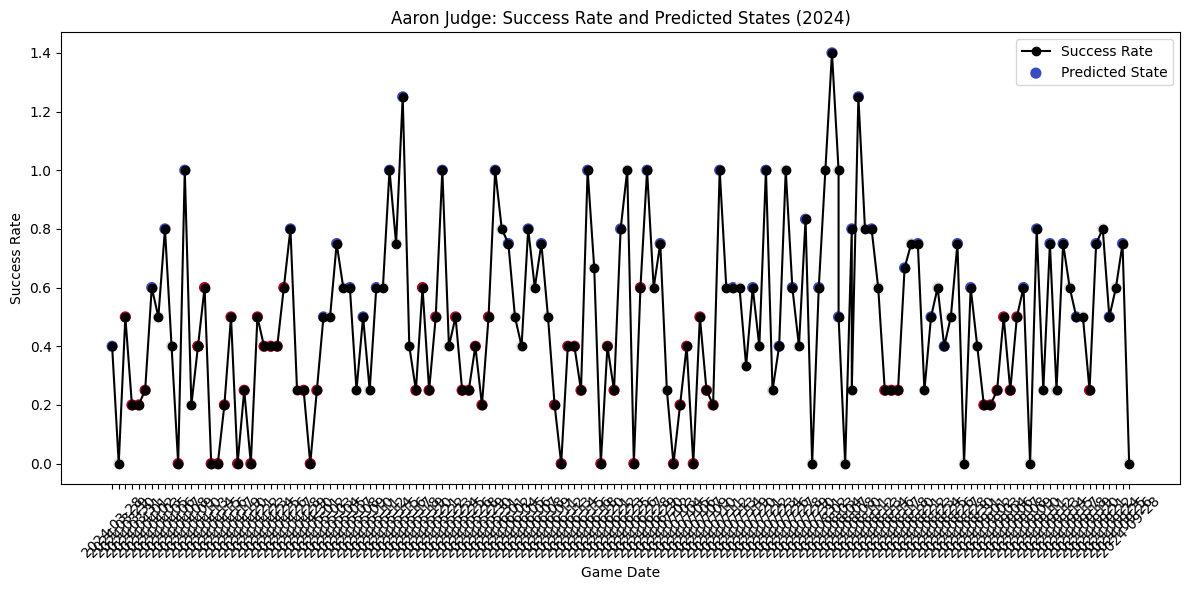

In [ ]:
# Step 1: Fetch 2024 Game Logs
player_id = 592450
year = 2024

# Fetch game logs for 2024
df_2024 = fetch_game_logs(player_id, year)

if df_2024 is not None and not df_2024.empty:
    # Step 2: Calculate Success and Success Rate
    df_2024["Success"] = (
        df_2024["H"] + df_2024["BB"] + df_2024["IBB"] +
        df_2024["HBP"] + df_2024["SF"] + df_2024["SH"]
    )
    df_2024["Success_Rate"] = (df_2024["Success"] / df_2024["PA"]).round(3)

    # Drop rows with no plate appearances
    df_2024 = df_2024[df_2024["PA"] > 0]

    # Step 3: Predict States Using the HMM
    success_rates_2024 = df_2024["Success_Rate"].dropna().values.reshape(-1, 1)
    predicted_states = model.predict(success_rates_2024)

    # Add predicted states to the DataFrame
    df_2024["Predicted_State"] = predicted_states
    state_mapping = {0: "Hot", 1: "Average", 2: "Cold"}
    df_2024["Predicted_State_Label"] = df_2024["Predicted_State"].map(state_mapping)

    # Step 4: Display Results
    print("\n2024 Game Logs with Predicted States:")
    print(df_2024[["Date", "PA", "Success", "Success_Rate", "Predicted_State_Label"]])

    # Step 5: Visualize Predictions
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.plot(df_2024["Date"], df_2024["Success_Rate"], label="Success Rate", marker="o", color="black")
    plt.scatter(
        df_2024["Date"], df_2024["Success_Rate"],
        c=df_2024["Predicted_State"], cmap="coolwarm", label="Predicted State", s=50
    )
    plt.title("Aaron Judge: Success Rate and Predicted States (2024)")
    plt.xlabel("Game Date")
    plt.ylabel("Success Rate")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 2024 game logs available to process.")
